## Goal: Visualizaing 784 Dimension data ( By using Dimensionality reduction)

#### Methods we are going to use for Dimensionality Reduction:
**PCA**     
**t-SNE ( t-Distributed stochastic neighbourhood embedding)**

In [1]:
## Imprting the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
## Dataset that we are going to use
mnist_data=pd.read_csv('/Users/dollymoulekhi/Desktop/digit-recognizer/train.csv')
mnist_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# save the labels into a variable l.
l = mnist_data['label']

# Drop the label feature and store the pixel data in d.
d = mnist_data.drop("label",axis=1)

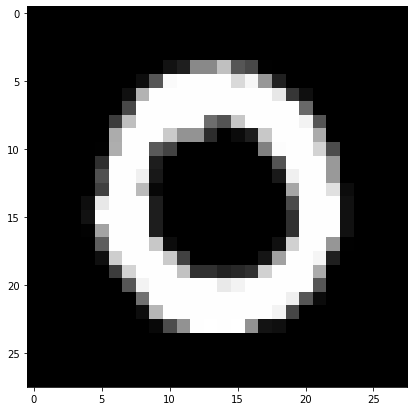

0


In [15]:
# display or plot a number.

plt.figure(figsize=(7,7))
idx = 1

grid_data = d.iloc[idx].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

## 2D Visualization using PCA ( manually Doing Dimensionality reduction )

In [17]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(d)
print(standardized_data.shape)

(42000, 784)


**We are standardizing the data so the mean of every column will be 0 and standard deviation is 1**
**Now we will be creating Co-Varience Matrix**

**Formula for Co-Variance: COV(X,Y)=1/n*Sum From i=1 to n(xi-mean of x)*(yi-mean of y)**
**COV(f1,f2)= 1/n *sum FRom i=1 to n ((xi1-mean of x1)*(xi2-mean of x2)**  [since dats is standarized so mean of x1= meann of x2=0]
**COV(f1,f2)=1/n*sum FRom i=1 to n (xi1)*(xi2)*
==> 1/n*sum FRom i=1 to n (xi1 dot product xi2)

**So instead of dot product we can write 1/n(xi1)T * (xi2)**





In [20]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


**So we want to reduce the dimensions from 784 dimension to 2 dimension so that we can do further visulaization of data.**
**So we will choose those 2 dimension where spred will be maximum.**
and we will get the information of maximum spread by the top two eigen values of covariance matrix.**

**Now lets calculate the eigen values **


In [30]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
print(values)

#vectors[:,0] represents the eigen vector corresponding to the 2nd eigen value.(First column in the vectors matrix)
#vectors[:,1] represents the eigen vector correspondign to the 1st eigen value.(Second column in the vectors matrix)

#Note : Eigen values are arranged in ascending order so the Eigen vectors too.


# converting the eigen vectors into (2,d) shape for ease of computation which we do it later.
vector = vectors.T

print("Updated shape of eigen vectors = ",vector.shape)
# Here, vectors[0] represent the eigen vector corresponding to the 2nd eigen value.
# Here, vectors[1] represent the eigen vector corresponding to the 1st eigen value.


#For sanity check.
print((vector[0] == vectors[:,0]).all())
print((vector[1] == vectors[:,1]).all())

#Now, we need to swap the rows of the vector matrix such that the first row corresponds to the eigen vector with the largest eigen value and the second row corresponds to the eigen vector with the second largest eigen value.

vector[[0,1]]=vector[[1,0]]


Shape of eigen vectors =  (784, 2)
[1222652.44613786 1709211.41082575]
Updated shape of eigen vectors =  (2, 784)
True
True


In [ ]:
**projection of xi on u1(Or in the direction of u1): u1T*xi**

In [36]:
# projecting the original data onto the eigen basis.( projecting my original data in the direction of maximum eigen values)
# Basically, we form a matrix with the eigen vectors in row order. Then, we do a matrix-vector multiplication between the matrix we formed and all the data vectors.

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vector, sample_data.T)

print (" resultant new data points' shape ", vector.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)


 resultant new data points' shape  (2, 784) X (784, 42000)  =  (2, 42000)


In [39]:
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.140478      -5.226445    1.0
1      19.292332       6.032996    0.0
2      -7.644503      -1.705813    1.0
3      -0.474207       5.836139    4.0
4      26.559574       6.024818    0.0


/opt/miniconda3/envs/mlenv/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


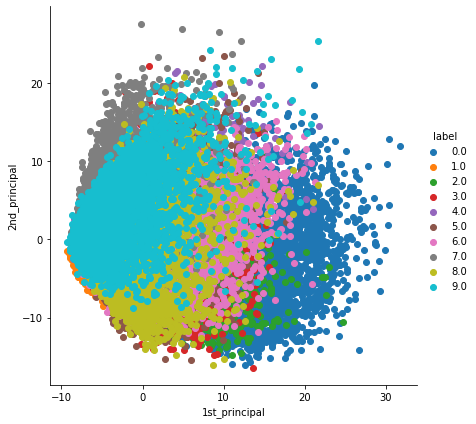

In [41]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

## PCA using Scikit-Learn

In [42]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

In [43]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)



shape of pca_reduced.shape =  (42000, 2)


/opt/miniconda3/envs/mlenv/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


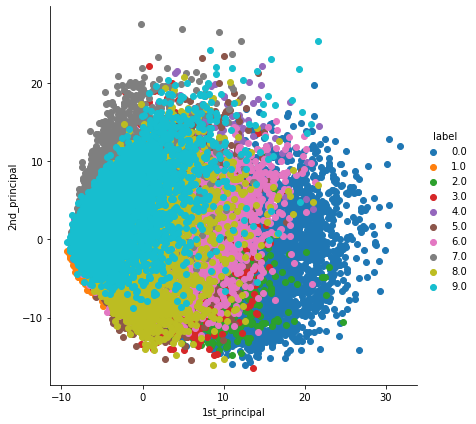

In [44]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [80]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)
pca_data

array([[-5.14047772e+00, -5.22644540e+00,  3.88700075e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.92923323e+01,  6.03299601e+00,  1.30814797e+00, ...,
        -4.74160378e-15,  2.57386617e-15,  1.32893371e-16],
       [-7.64450341e+00, -1.70581328e+00,  2.28932646e+00, ...,
         4.37731140e-16,  8.56121603e-16, -7.55819688e-16],
       ...,
       [ 4.95391370e-01,  7.07627667e+00, -1.20896995e+01, ...,
         1.08969817e-17,  2.73753946e-17, -2.12182505e-18],
       [ 2.30724011e+00, -4.34451279e+00,  6.99847802e-01, ...,
        -1.10631725e-17, -2.68270647e-17, -2.04574692e-19],
       [-4.80767022e+00,  1.55912058e+00, -2.49793585e+00, ...,
         1.16841993e-17, -1.79526660e-17,  1.40453762e-19]])

In [85]:
np.sum(pca.explained_variance_)

708.0168575442277

In [91]:
np.cumsum(pca.explained_variance_ / np.sum(pca.explained_variance_))

array([0.05747953, 0.09859644, 0.13642512, 0.16582374, 0.19138813,
       0.21368657, 0.2332121 , 0.25092815, 0.26655475, 0.28080431,
       0.2944144 , 0.3066398 , 0.31799717, 0.32912807, 0.33963118,
       0.34975443, 0.35926746, 0.36861261, 0.37768519, 0.38653847,
       0.39492754, 0.40304781, 0.41079942, 0.41832254, 0.42559944,
       0.432587  , 0.43949155, 0.44614078, 0.45244753, 0.45861055,
       0.46471977, 0.47069014, 0.47646297, 0.4821998 , 0.48784802,
       0.49331123, 0.49870554, 0.50394915, 0.50899758, 0.51388288,
       0.51870532, 0.52346433, 0.52806441, 0.53264069, 0.53713653,
       0.54160375, 0.54604212, 0.55041049, 0.55473762, 0.55900789,
       0.56320058, 0.56732239, 0.57134699, 0.57534133, 0.57929025,
       0.5831983 , 0.58699728, 0.59072182, 0.59440595, 0.59806318,
       0.60159596, 0.60510684, 0.60856097, 0.61197491, 0.61535276,
       0.61871752, 0.62203462, 0.62533187, 0.62853203, 0.63169979,
       0.63482674, 0.63794535, 0.64102748, 0.64406024, 0.64707

## PCA for dimensionality redcution (not for visualization)

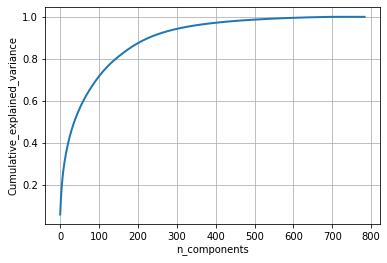

In [49]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)


## pca.explained_variance: lambda i
## np.sum(pca.explained_variance_): summation of lambda i
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_); # lambda i/(summation of lambda i)

cum_var_explained = np.cumsum(percentage_var_explained) # lambda 1/( sum of all lambda values), (lambda 1+ lambda 2)/sum of all lambda 

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.

## t-SNE using Scikit-Learn

/opt/miniconda3/envs/mlenv/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


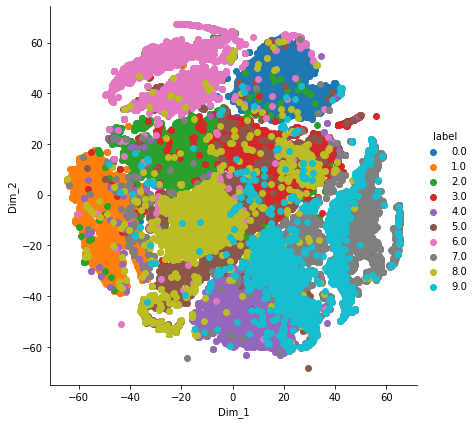

In [92]:
# TSNE

from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = standardized_data
labels_1000 = labels

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

/opt/miniconda3/envs/mlenv/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


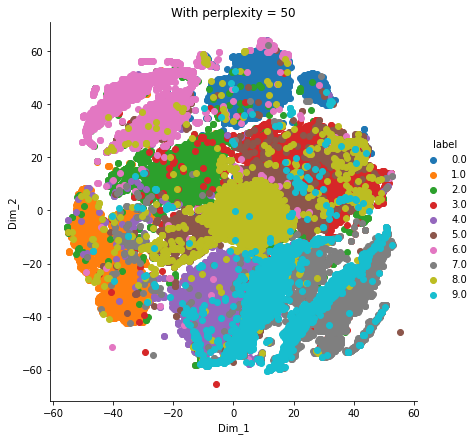

In [93]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
pltfigure(figsize=(15, 6))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

**So we can see, t-SNE is segerating the data in different classes properly**